# 국내 코스피 시장의 캘린더 효과 유효성 검증
*  정보데이터시스템 http://data.krx.co.kr/



> # O. 한글폰트 설치 후 진행

> ## 1) 한글 폰트 설치

In [1]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

> ## 2) <font color = 'red'>설치 후 '**런타임 다시 시작**'</font>

* 런타임 강제 종료 후 다시 시작

In [ ]:
import os

os.kill(os.getpid(), 9)

> ## 3) 한글 폰트 설정

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 전역폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

> # I. Data Load

> ## 1) 패키지 불러오기

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> ## 2) KOSPI 데이터 불러오기

In [4]:
url1 = 'https://raw.githubusercontent.com/Rachel-HyowonKim/EDA_SemiProject_BomB/main/KOSPI_Daily_Data_01.csv'
url2 = 'https://raw.githubusercontent.com/Rachel-HyowonKim/EDA_SemiProject_BomB/main/KOSPI_Daily_Data_02.csv'
url3 = 'https://raw.githubusercontent.com/Rachel-HyowonKim/EDA_SemiProject_BomB/main/KOSPI_Monthly_Data.csv'

In [5]:
ks_day1 = pd.read_csv(url1)
ks_day2 = pd.read_csv(url2)
ks_mon = pd.read_csv(url3)

# II. Preprocessing

> ## 1) MONTH 데이터

> ### 1-1) 데이터 전처리

* 데이터 확인

In [6]:
ks_mon

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 03- 01,"2,689.32","2,664.52","2,718.76","2,630.16",5.06B,1.78%
1,2024- 02- 01,"2,642.36","2,491.93","2,694.80","2,491.93",10.03B,5.82%
2,2024- 01- 01,"2,497.09","2,645.47","2,675.80","2,429.12",12.21B,-5.96%
3,2023- 12- 01,"2,655.28","2,520.49","2,655.28","2,481.00",8.54B,4.73%
4,2023- 11- 01,"2,535.29","2,292.89","2,535.29","2,288.64",9.19B,11.30%
...,...,...,...,...,...,...,...
510,1981- 09- 01,132.30,132.30,132.30,132.30,19.31M,-5.57%
511,1981- 08- 01,140.10,140.10,140.10,140.10,20.63M,-5.40%
512,1981- 07- 01,148.10,148.10,148.10,148.10,41.03M,-1.79%
513,1981- 06- 01,150.80,150.80,150.80,150.80,57.85M,19.40%


*   날짜 열을 datetime 형식으로 변환 후 날짜 열 기준으로 정렬

In [7]:
ks_mon['날짜'] = pd.to_datetime(ks_mon['날짜'])
ks_mon = ks_mon.sort_values(by='날짜')

ks_mon

,날짜,종가,시가,고가,저가,거래량,변동 %
514,1981-05-01,126.30,126.30,126.30,126.30,34.75M,3.19%
513,1981-06-01,150.80,150.80,150.80,150.80,57.85M,19.40%
512,1981-07-01,148.10,148.10,148.10,148.10,41.03M,-1.79%
511,1981-08-01,140.10,140.10,140.10,140.10,20.63M,-5.40%
510,1981-09-01,132.30,132.30,132.30,132.30,19.31M,-5.57%
...,...,...,...,...,...,...,...
4,2023-11-01,"2,535.29","2,292.89","2,535.29","2,288.64",9.19B,11.30%
3,2023-12-01,"2,655.28","2,520.49","2,655.28","2,481.00",8.54B,4.73%
2,2024-01-01,"2,497.09","2,645.47","2,675.80","2,429.12",12.21B,-5.96%
1,2024-02-01,"2,642.36","2,491.93","2,694.80","2,491.93",10.03B,5.82%


*   정보 확인

In [8]:
ks_mon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 514 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      515 non-null    datetime64[ns]
 1   종가      515 non-null    object        
 2   시가      515 non-null    object        
 3   고가      515 non-null    object        
 4   저가      515 non-null    object        
 5   거래량     515 non-null    object        
 6   변동 %    515 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 32.2+ KB


In [9]:
ks_mon = ks_mon.drop(columns = ['고가', '저가', '거래량'])

ks_mon

,날짜,종가,시가,변동 %
514,1981-05-01,126.30,126.30,3.19%
513,1981-06-01,150.80,150.80,19.40%
512,1981-07-01,148.10,148.10,-1.79%
511,1981-08-01,140.10,140.10,-5.40%
510,1981-09-01,132.30,132.30,-5.57%
...,...,...,...,...
4,2023-11-01,"2,535.29","2,292.89",11.30%
3,2023-12-01,"2,655.28","2,520.49",4.73%
2,2024-01-01,"2,497.09","2,645.47",-5.96%
1,2024-02-01,"2,642.36","2,491.93",5.82%


In [10]:
ks_mon.rename(columns={'변동 %': '수익률(%)'}, inplace=True)

ks_mon

,날짜,종가,시가,수익률(%)
514,1981-05-01,126.30,126.30,3.19%
513,1981-06-01,150.80,150.80,19.40%
512,1981-07-01,148.10,148.10,-1.79%
511,1981-08-01,140.10,140.10,-5.40%
510,1981-09-01,132.30,132.30,-5.57%
...,...,...,...,...
4,2023-11-01,"2,535.29","2,292.89",11.30%
3,2023-12-01,"2,655.28","2,520.49",4.73%
2,2024-01-01,"2,497.09","2,645.47",-5.96%
1,2024-02-01,"2,642.36","2,491.93",5.82%


*   날짜를 인덱스로 지정

In [11]:
ks_mon.set_index('날짜', inplace=True) # 날짜를 인덱스로 지정

ks_mon

,종가,시가,수익률(%)
날짜,,,
1981-05-01,126.30,126.30,3.19%
1981-06-01,150.80,150.80,19.40%
1981-07-01,148.10,148.10,-1.79%
1981-08-01,140.10,140.10,-5.40%
1981-09-01,132.30,132.30,-5.57%
...,...,...,...
2023-11-01,"2,535.29","2,292.89",11.30%
2023-12-01,"2,655.28","2,520.49",4.73%
2024-01-01,"2,497.09","2,645.47",-5.96%


* 정보 확인

In [12]:
ks_mon.info() # 날짜, 고가, 저가, 거래량이 빠진 것 확인 # 인덱스 바뀐 것 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 1981-05-01 to 2024-03-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종가      515 non-null    object
 1   시가      515 non-null    object
 2   수익률(%)  515 non-null    object
dtypes: object(3)
memory usage: 16.1+ KB


* 날짜 범위 설정

In [13]:
# 특정 시작 날짜와 종료 날짜 설정
start_date = '2004-01-01'
end_date = '2023-12-01'

# 원하는 날짜 범위 추출
ks_mon = ks_mon.loc[start_date:end_date]

# 추출된 데이터 확인
ks_mon

,종가,시가,수익률(%)
날짜,,,
2004-01-01,848.50,816.26,4.66%
2004-02-01,883.42,850.28,4.12%
2004-03-01,880.50,892.57,-0.33%
2004-04-01,862.84,878.78,-2.01%
2004-05-01,803.84,863.03,-6.84%
...,...,...,...
2023-08-01,"2,556.27","2,644.34",-2.90%
2023-09-01,"2,465.07","2,551.93",-3.57%
2023-10-01,"2,277.99","2,435.78",-7.59%


* MONTH별 데이터 요약 통계

In [14]:
ks_mon.describe()

,종가,시가,수익률(%)
count,240,240,240
unique,239,240,230
top,"1,912.06",816.26,-0.50%
freq,2,1,3


* Month 데이터 상위 5개 확인

In [15]:
ks_mon.head()

,종가,시가,수익률(%)
날짜,,,
2004-01-01,848.50,816.26,4.66%
2004-02-01,883.42,850.28,4.12%
2004-03-01,880.50,892.57,-0.33%
2004-04-01,862.84,878.78,-2.01%
2004-05-01,803.84,863.03,-6.84%


* 열 정보 확인

In [16]:
ks_mon.columns

Index(['종가', '시가', '수익률(%)'], dtype='object')

* 결측치 확인

In [17]:
ks_mon.isnull().sum(axis = 0).sort_values(ascending = False)  # 결측치 확인

종가        0
시가        0
수익률(%)    0
dtype: int64

> ### 1-2) 기준값 통일

*   데이터를 숫자형으로 변환 및 기호 삭제

In [18]:
# 기호 제거하고 숫자로 변환
ks_mon['수익률(%)'] = ks_mon['수익률(%)'].str.replace('%', '').astype(float)
ks_mon['종가'] = ks_mon['종가'].str.replace(',', '').astype(float)
ks_mon['시가'] = ks_mon['시가'].str.replace(',', '').astype(float)

# 변환 후 데이터 확인
print(ks_mon.head())

                종가      시가  수익률(%)
날짜                                
2004-01-01  848.50  816.26    4.66
2004-02-01  883.42  850.28    4.12
2004-03-01  880.50  892.57   -0.33
2004-04-01  862.84  878.78   -2.01
2004-05-01  803.84  863.03   -6.84


*   정보 확인

In [19]:
ks_mon.info() # 데이터 타입 바뀐 것 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2004-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      240 non-null    float64
 1   시가      240 non-null    float64
 2   수익률(%)  240 non-null    float64
dtypes: float64(3)
memory usage: 7.5 KB


In [20]:
ks_mon

,종가,시가,수익률(%)
날짜,,,
2004-01-01,848.50,816.26,4.66
2004-02-01,883.42,850.28,4.12
2004-03-01,880.50,892.57,-0.33
2004-04-01,862.84,878.78,-2.01
2004-05-01,803.84,863.03,-6.84
...,...,...,...
2023-08-01,2556.27,2644.34,-2.90
2023-09-01,2465.07,2551.93,-3.57
2023-10-01,2277.99,2435.78,-7.59


> ### 1-3) 데이터 분석 및 시각화

> #### a) MONTH 데이터 변동성 시각화

*   '수익률' 열의 데이터를 숫자형으로 변환하고, 변동성을 시각화

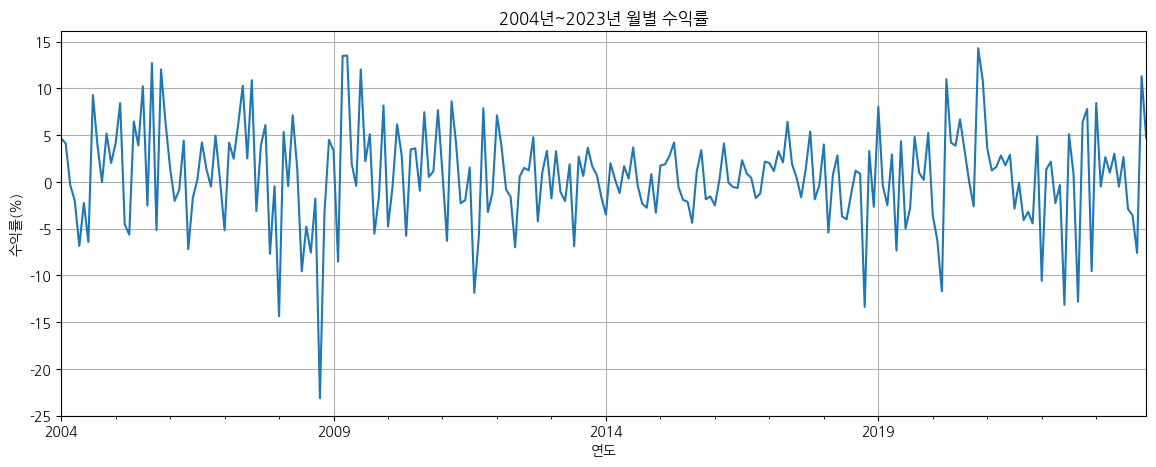

In [21]:
ks_mon['수익률(%)'] = pd.to_numeric(ks_mon['수익률(%)'], errors='coerce')
ks_mon['수익률(%)'].plot(figsize=(14, 5))
plt.xlabel('연도')
plt.ylabel('수익률(%)')
plt.title('2004년~2023년 월별 수익률')
plt.grid()

plt.show()

> #### b) '월' 기준 MONTH 데이터 분석

*   '월'이라는 새로운 열을 생성

In [22]:
ks_mon['월'] = ks_mon.index.strftime('%m')

ks_mon

,종가,시가,수익률(%),월
날짜,,,,
2004-01-01,848.50,816.26,4.66,01
2004-02-01,883.42,850.28,4.12,02
2004-03-01,880.50,892.57,-0.33,03
2004-04-01,862.84,878.78,-2.01,04
2004-05-01,803.84,863.03,-6.84,05
...,...,...,...,...
2023-08-01,2556.27,2644.34,-2.90,08
2023-09-01,2465.07,2551.93,-3.57,09
2023-10-01,2277.99,2435.78,-7.59,10


In [23]:
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.2f}'.format

*   월을 기준으로 데이터를 그룹화하고, 각 그룹에서 '수익률' 열의 평균 계산

*   월별로 변동성이 어떻게 변하는지를 살펴보고 특정 시기에 변동성이 높거나 낮은지를 파악

* 2004~2023년 월별 평균 수익률

In [24]:
# 20년 월별 평균 수익률

monthly_mean_change = ks_mon.groupby('월')['수익률(%)'].mean()
print(monthly_mean_change)

월
01    0.16
02    0.36
03    1.31
04    2.51
05   -0.12
06   -0.96
07    2.06
08   -0.71
09    1.06
10   -1.87
11    1.89
12    1.97
Name: 수익률(%), dtype: float64


* 2004~2023년 월 평균 수익률

In [25]:
# 20년 월 평균 수익률

monthly_mean_return = ks_mon['수익률(%)'].mean()

# 소수점 둘째 자리까지 출력 형식 지정
formatted_mean_return = '{:.2f}'.format(monthly_mean_return)

# 출력
print(formatted_mean_return)

0.64


> #### c) '월' 기준 MONTH 데이터 변동성 시각화

*  2004~2023 월별 평균 수익률과 기준선 비교 시각화

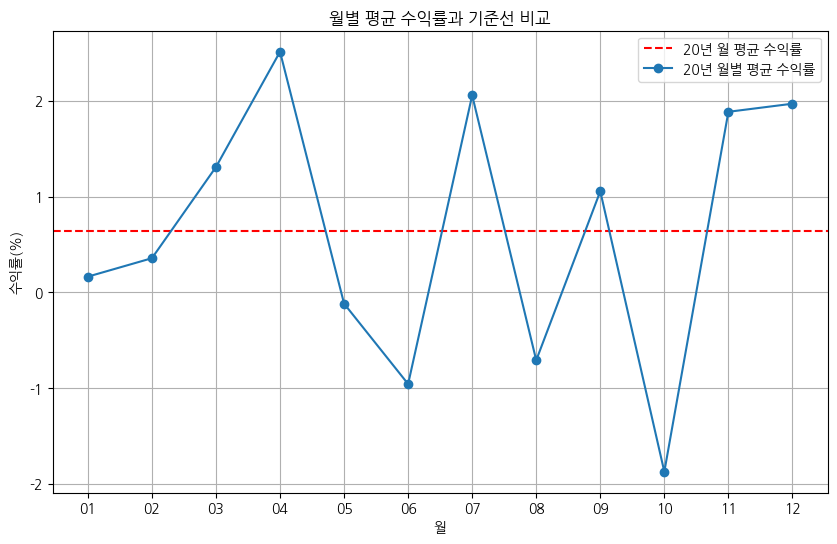

In [26]:
# 시각화
plt.figure(figsize=(10, 6))
plt.axhline(y=monthly_mean_return, color='r', linestyle='--', label='20년 월 평균 수익률')
plt.plot(monthly_mean_change.index, monthly_mean_change.values, marker='o', label='20년 월별 평균 수익률')
plt.title('월별 평균 수익률과 기준선 비교')
plt.xlabel('월')
plt.ylabel('수익률(%)')
plt.xticks(monthly_mean_change.index)
plt.legend()
plt.grid(True)
plt.show()

* boxplot - 월별 주식 시장의 수익률 시각화

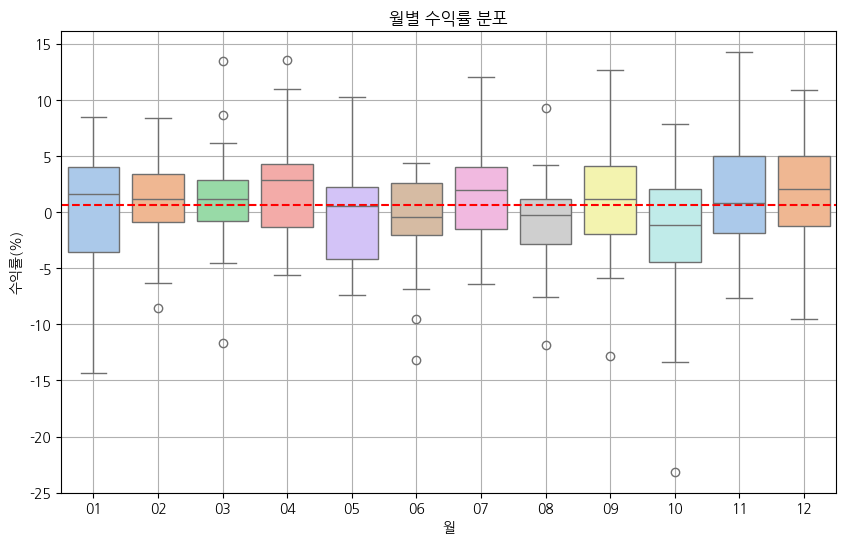

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='월', y='수익률(%)', data=ks_mon, palette = 'pastel')
plt.title('월별 수익률 분포')
plt.xlabel('월')
plt.ylabel('수익률(%)')
plt.grid(True)
plt.axhline(y=monthly_mean_return, color='r', linestyle='--', label='월 평균 수익률')
plt.show()

* 히트맵을 통한 특정 월과 전체 월의 평균 수익률을 시각적으로 비교

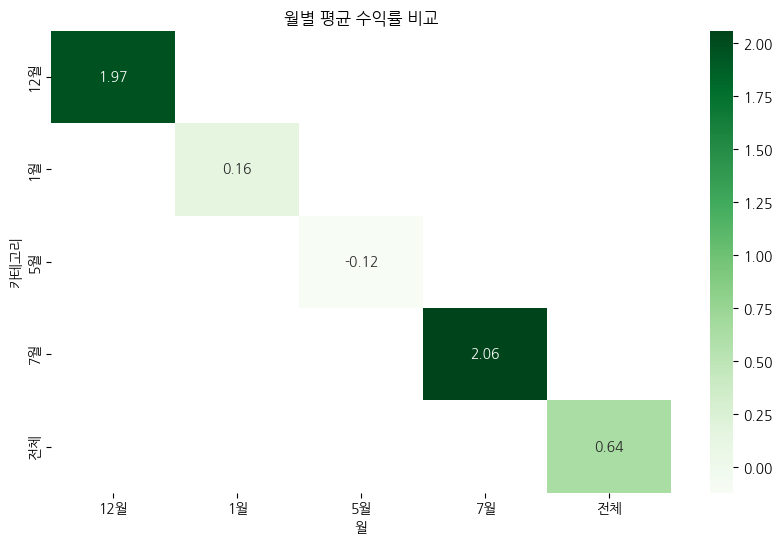

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 월의 평균 수익률
specific_months = {'1월': 0.16,
                   '5월': -0.12,
                   '7월': 2.06,
                   '12월': 1.97}

# 데이터를 저장할 리스트 생성
data = [('전체', '전체', monthly_mean_return),
        ('1월', '1월', specific_months['1월']),
        ('5월', '5월', specific_months['5월']),
        ('7월', '7월', specific_months['7월']),
        ('12월', '12월', specific_months['12월'])]

# 데이터를 DataFrame으로 변환
total_mon_ave = pd.DataFrame(data, columns=['카테고리', '월', '평균 수익률'])

# 히트맵을 위해 DataFrame을 피봇
pivot_tma = total_mon_ave.pivot("카테고리", "월", "평균 수익률")

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_tma, annot=True, cmap="Greens", fmt=".2f")
plt.title("월별 평균 수익률 비교")
plt.xlabel("월")
plt.ylabel("카테고리")
plt.show()

*  특정 월별 평균 수익률을 포함한 데이터프레임을 생성

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 전체 월별 평균 수익률
monthly_mean_return = 0.64

# 특정 월의 평균 수익률
specific_months = {'1월': 0.16,
                   '5월': -0.12,
                   '7월': 2.06,
                   '12월': 1.97}

# 데이터를 DataFrame으로 변환
data = pd.DataFrame({'월': list(specific_months.keys()), '평균 수익률(%)': list(specific_months.values())})

data

,월,평균 수익률(%)
0,1월,0.16
1,5월,-0.12
2,7월,2.06
3,12월,1.97


* seaborn을 사용하여 월별 평균 수익률을 막대 그래프로 시각화

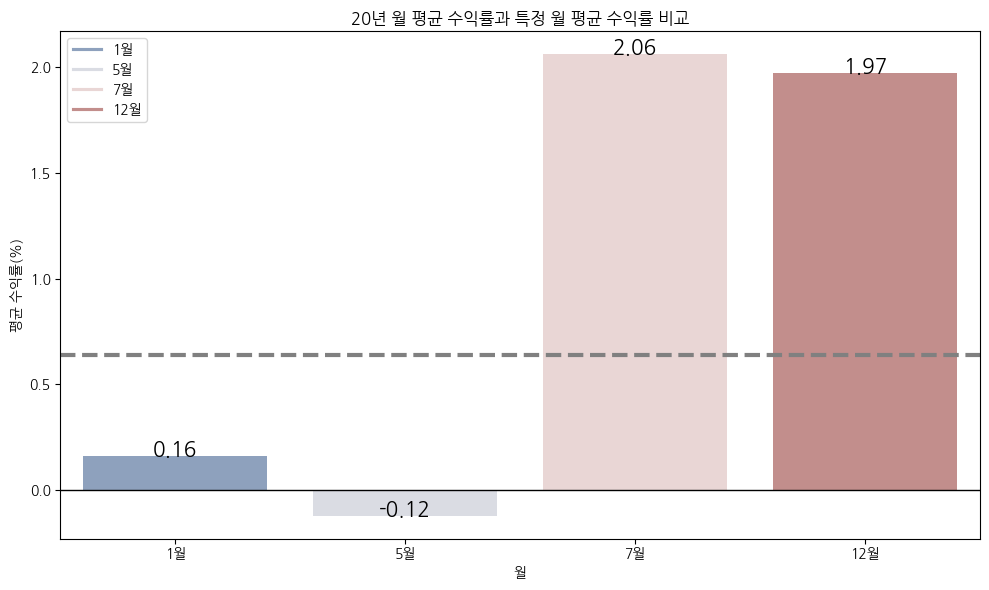

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = '월', y = '평균 수익률(%)', data = data, palette = "vlag")
plt.axhline(y = monthly_mean_return, color = 'grey', linestyle = '--',linewidth = 3)
plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 1)

# Add text labels above each bar
for index, row in data.iterrows():
    ax.text(index, row['평균 수익률(%)'], str(row['평균 수익률(%)']), fontsize = 15, color = 'black', ha = "center")

plt.xlabel('월')
plt.ylabel('평균 수익률(%)')
plt.title('20년 월 평균 수익률과 특정 월 평균 수익률 비교')

labels = data['월']
legend = plt.legend(labels = labels)

for i, label in enumerate(data['월']):
    legend.get_lines()[i].set_color(ax.patches[i].get_facecolor())

plt.tight_layout()

plt.show()

> #### d) t-test

* 월별 주식 시장의 수익률에 대한 t-테스트를 수행하여 각 월의 평균 수익률이 다른 달과 유의하게 다른지를 확인


- 귀무가설 (H0) : "기준 월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없다."
- 대립가설 (H1) : "기준 월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 있다."

In [31]:
from scipy.stats import ttest_ind

# 월별 평균 수익률을 저장할 딕셔너리 생성
monthly_t_tests = {}

# 1월부터 12월까지 반복하여 티테스트 진행
alpha = 0.1
for month in range(1, 13):
    # 기준 월의 데이터 추출
    month_data = ks_mon[ks_mon.index.month == month]['수익률(%)']
    # 나머지 달의 데이터 추출 (기준월 제외)
    other_months_data = ks_mon[ks_mon.index.month != month]['수익률(%)']
    # 티테스트 수행
    t_statistic, p_value = ttest_ind(month_data, other_months_data)
    # 결과 저장
    monthly_t_tests[month] = {'t-statistic': t_statistic, 'p-value': p_value}

# # 결과 출력
# for month, test_result in monthly_t_tests.items():
#     t_statistic_formatted = "{:.2f}".format(test_result['t-statistic'])
#     p_value_formatted = "{:.2f}".format(test_result['p-value'])
#     print(f"{month}월:")
#     print("t-statistic:", test_result['t-statistic'])
#     print("p-value:", test_result['p-value'])
#     if test_result['p-value'] < alpha:
#         print(f"귀무가설이 기각됩니다. 따라서 {month}월의 평균 수익률은 나머지 달 평균 수익률에 비해 유의하게 다릅니다.")
#     else:
#         print(f"귀무가설이 채택됩니다. 따라서 {month}월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.")
#     print()

# 결과 출력
for month, test_result in monthly_t_tests.items():
    t_statistic_formatted = "{:.2f}".format(test_result['t-statistic'])
    p_value_formatted = "{:.2f}".format(test_result['p-value'])
    print(f"{month}월:")
    print("t-statistic:", t_statistic_formatted)
    print("p-value:", p_value_formatted)
    if test_result['p-value'] < alpha:
        print(f"귀무가설이 기각됩니다. 따라서 {month}월의 평균 수익률은 나머지 달 평균 수익률에 비해 유의하게 다릅니다.")
    else:
        print(f"귀무가설이 채택됩니다. 따라서 {month}월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.")
    print()

1월:
t-statistic: -0.42
p-value: 0.68
귀무가설이 채택됩니다. 따라서 1월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

2월:
t-statistic: -0.25
p-value: 0.81
귀무가설이 채택됩니다. 따라서 2월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

3월:
t-statistic: 0.59
p-value: 0.56
귀무가설이 채택됩니다. 따라서 3월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

4월:
t-statistic: 1.66
p-value: 0.10
귀무가설이 기각됩니다. 따라서 4월의 평균 수익률은 나머지 달 평균 수익률에 비해 유의하게 다릅니다.

5월:
t-statistic: -0.66
p-value: 0.51
귀무가설이 채택됩니다. 따라서 5월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

6월:
t-statistic: -1.41
p-value: 0.16
귀무가설이 채택됩니다. 따라서 6월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

7월:
t-statistic: 1.25
p-value: 0.21
귀무가설이 채택됩니다. 따라서 7월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

8월:
t-statistic: -1.19
p-value: 0.24
귀무가설이 채택됩니다. 따라서 8월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

9월:
t-statistic: 0.37
p-value: 0.71
귀무가설이 채택됩니다. 따라서 9월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의한 차이가 없습니다.

10월:
t-statistic: -2.23
p-value: 0.03
귀무가설이 기각됩니다. 따라서 10월의 평균 수익률은 나머지 달 평균 수익률에 비해 유의하게 다릅니다.

11월:
t-statistic: 1.

> #### e) t-test 시각화

* 월별 t-통계량 시각화

  각 월별로 해당 월의 수익률과 다른 월의 수익률 간의 차이를 나타내는 t-통계량 시각화

  다른 월의 수익률 평균의 기준을 0으로 치환

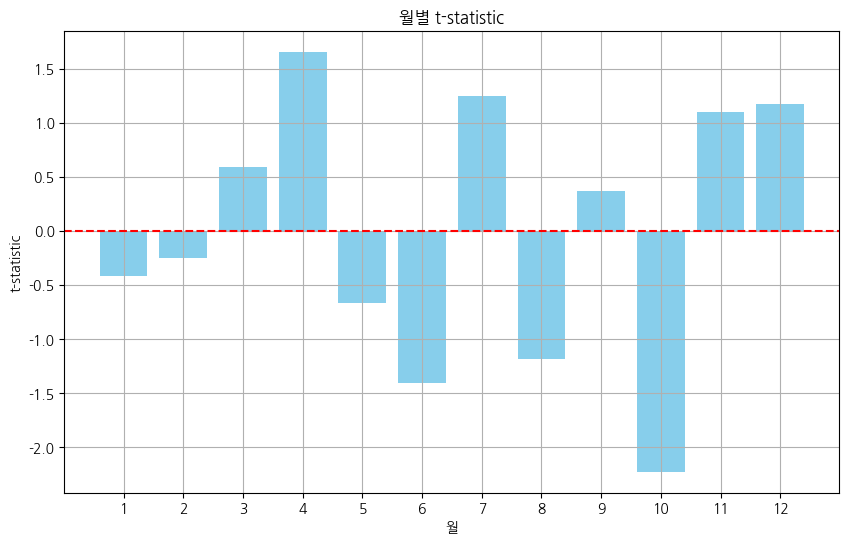

In [32]:
import matplotlib.pyplot as plt

# 월별 t-statistic을 추출하여 리스트로 저장
t_statistics = [test_result['t-statistic'] for test_result in monthly_t_tests.values()]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), t_statistics, color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('월별 t-statistic')
plt.xlabel('월')
plt.ylabel('t-statistic')

# x축 눈금 설정
plt.xticks(range(1, 13))

# 그래프 표시
plt.axhline(y=0.0, color='red', linestyle='--', label='알파 값')
plt.grid(True)
plt.show()

 어떤 월의 p-value 값이 유의수준보다 낮으면, 해당 월의 수익률은 다른 달과 유의하게 다르다는 의미

- 귀무가설 (H0) : "해당 월의 수익률의 나머지 달에 평균 수익률에 비해 유의미한 차이가 없습니다."
- 대립가설 (H1) : "해당 월의 평균 수익률은 나머지 달에 평균 수익률에 비해 유의하게 다릅니다."

유의수준(=0.1)보다 작을 경우에는 귀무가설을 기각하고 두 집단 간에는 유의한 차이가 있다고 판단

* 어닝시즌

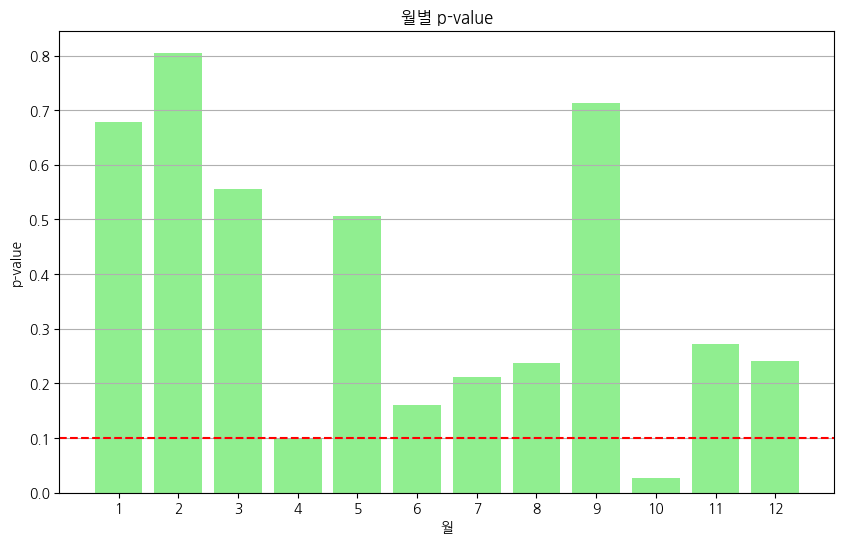

In [33]:
import matplotlib.pyplot as plt

# 월별 p-value을 추출하여 리스트로 저장
p_values = [test_result['p-value'] for test_result in monthly_t_tests.values()]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), p_values, color='lightgreen')
plt.axhline(y=alpha, color='red', linestyle='--', label='알파 값')

# 그래프 제목과 축 라벨 설정
plt.title('월별 p-value')
plt.xlabel('월')
plt.ylabel('p-value')

# x축 눈금 설정
plt.xticks(range(1, 13))

# 그래프 표시
plt.grid(axis='y')
plt.show()

> ## 2) DAY 데이터



> ### 2-1) 데이터 전처리



*   데이터 확인

In [34]:
ks_day1

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2013- 12- 31,"2,011.34","2,004.32","2,011.34","1,998.61",172.23K,0.00%
1,2013- 12- 30,"2,011.34","2,004.32","2,011.34","1,998.61",172.23M,0.45%
2,2013- 12- 27,"2,002.28","1,994.05","2,004.55","1,987.58",207.77M,0.15%
3,2013- 12- 26,"1,999.30","2,004.25","2,009.96","1,997.34",230.53M,-0.11%
4,2013- 12- 24,"2,001.59","2,000.24","2,007.34","1,994.34",214.69M,0.24%
...,...,...,...,...,...,...,...
2482,2004- 01- 08,824.15,831.10,839.28,824.15,428.76M,-0.35%
2483,2004- 01- 07,827.07,826.08,831.07,825.23,404.56M,0.44%
2484,2004- 01- 06,823.43,831.26,831.26,819.53,484.06M,-0.08%
2485,2004- 01- 05,824.10,817.28,825.43,816.55,408.26M,0.35%


In [35]:
ks_day2

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023- 12- 28,"2,655.28","2,616.27","2,655.28","2,611.72",460.09M,1.60%
1,2023- 12- 27,"2,613.50","2,599.35","2,613.50","2,590.08",349.73M,0.42%
2,2023- 12- 26,"2,602.59","2,609.44","2,612.14","2,594.65",440.43M,0.12%
3,2023- 12- 22,"2,599.51","2,617.72","2,621.37","2,599.51",465.97M,-0.02%
4,2023- 12- 21,"2,600.02","2,598.37","2,610.81","2,587.16",578.33M,-0.55%
...,...,...,...,...,...,...,...
2454,2014- 01- 08,"1,958.96","1,965.50","1,966.95","1,950.02",217.07M,-0.02%
2455,2014- 01- 07,"1,959.44","1,947.65","1,965.74","1,947.08",193.03M,0.32%
2456,2014- 01- 06,"1,953.28","1,947.62","1,961.85","1,943.74",193.63M,0.37%
2457,2014- 01- 03,"1,946.14","1,963.72","1,964.63","1,936.15",188.53M,-1.07%


*   ks_day1, ks_day2 병합



In [36]:
merged_ks = pd.concat([ks_day1, ks_day2], axis = 0)

merged_ks

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2013- 12- 31,"2,011.34","2,004.32","2,011.34","1,998.61",172.23K,0.00%
1,2013- 12- 30,"2,011.34","2,004.32","2,011.34","1,998.61",172.23M,0.45%
2,2013- 12- 27,"2,002.28","1,994.05","2,004.55","1,987.58",207.77M,0.15%
3,2013- 12- 26,"1,999.30","2,004.25","2,009.96","1,997.34",230.53M,-0.11%
4,2013- 12- 24,"2,001.59","2,000.24","2,007.34","1,994.34",214.69M,0.24%
...,...,...,...,...,...,...,...
2454,2014- 01- 08,"1,958.96","1,965.50","1,966.95","1,950.02",217.07M,-0.02%
2455,2014- 01- 07,"1,959.44","1,947.65","1,965.74","1,947.08",193.03M,0.32%
2456,2014- 01- 06,"1,953.28","1,947.62","1,961.85","1,943.74",193.63M,0.37%
2457,2014- 01- 03,"1,946.14","1,963.72","1,964.63","1,936.15",188.53M,-1.07%



* 날짜 열을 datetime 형식으로 변환 후 날짜 열 기준으로 정렬

In [37]:
merged_ks['날짜'] = pd.to_datetime(merged_ks['날짜'])  # 날짜 컬럼을 datetime 형식으로 변환
ks_day = merged_ks.sort_values(by='날짜')

ks_day

,날짜,종가,시가,고가,저가,거래량,변동 %
2486,2004-01-02,821.26,816.26,821.87,813.63,307.49M,1.30%
2485,2004-01-05,824.10,817.28,825.43,816.55,408.26M,0.35%
2484,2004-01-06,823.43,831.26,831.26,819.53,484.06M,-0.08%
2483,2004-01-07,827.07,826.08,831.07,825.23,404.56M,0.44%
2482,2004-01-08,824.15,831.10,839.28,824.15,428.76M,-0.35%
...,...,...,...,...,...,...,...
4,2023-12-21,"2,600.02","2,598.37","2,610.81","2,587.16",578.33M,-0.55%
3,2023-12-22,"2,599.51","2,617.72","2,621.37","2,599.51",465.97M,-0.02%
2,2023-12-26,"2,602.59","2,609.44","2,612.14","2,594.65",440.43M,0.12%
1,2023-12-27,"2,613.50","2,599.35","2,613.50","2,590.08",349.73M,0.42%



* 정보 확인



In [38]:
ks_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4946 entries, 2486 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4946 non-null   datetime64[ns]
 1   종가      4946 non-null   object        
 2   시가      4946 non-null   object        
 3   고가      4946 non-null   object        
 4   저가      4946 non-null   object        
 5   거래량     4946 non-null   object        
 6   변동 %    4946 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 309.1+ KB


In [39]:
ks_day = ks_day.drop(columns = ['고가', '저가', '거래량'])

ks_day

,날짜,종가,시가,변동 %
2486,2004-01-02,821.26,816.26,1.30%
2485,2004-01-05,824.10,817.28,0.35%
2484,2004-01-06,823.43,831.26,-0.08%
2483,2004-01-07,827.07,826.08,0.44%
2482,2004-01-08,824.15,831.10,-0.35%
...,...,...,...,...
4,2023-12-21,"2,600.02","2,598.37",-0.55%
3,2023-12-22,"2,599.51","2,617.72",-0.02%
2,2023-12-26,"2,602.59","2,609.44",0.12%
1,2023-12-27,"2,613.50","2,599.35",0.42%


In [40]:
ks_day.rename(columns={'변동 %': '수익률(%)'}, inplace=True)

ks_day

,날짜,종가,시가,수익률(%)
2486,2004-01-02,821.26,816.26,1.30%
2485,2004-01-05,824.10,817.28,0.35%
2484,2004-01-06,823.43,831.26,-0.08%
2483,2004-01-07,827.07,826.08,0.44%
2482,2004-01-08,824.15,831.10,-0.35%
...,...,...,...,...
4,2023-12-21,"2,600.02","2,598.37",-0.55%
3,2023-12-22,"2,599.51","2,617.72",-0.02%
2,2023-12-26,"2,602.59","2,609.44",0.12%
1,2023-12-27,"2,613.50","2,599.35",0.42%


*  날짜를 인덱스로 지정



In [41]:
ks_day.set_index('날짜', inplace=True) # 날짜를 인덱스로 지정

ks_day

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30%
2004-01-05,824.10,817.28,0.35%
2004-01-06,823.43,831.26,-0.08%
2004-01-07,827.07,826.08,0.44%
2004-01-08,824.15,831.10,-0.35%
...,...,...,...
2023-12-21,"2,600.02","2,598.37",-0.55%
2023-12-22,"2,599.51","2,617.72",-0.02%
2023-12-26,"2,602.59","2,609.44",0.12%


*   정보 확인



In [42]:
ks_day.info() # 날짜, 고가, 저가, 거래량이 빠진 것 확인 # 인덱스 바뀐 것 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4946 entries, 2004-01-02 to 2023-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종가      4946 non-null   object
 1   시가      4946 non-null   object
 2   수익률(%)  4946 non-null   object
dtypes: object(3)
memory usage: 154.6+ KB



* DAY별 데이터 요약 통계



In [43]:
ks_day.describe()

,종가,시가,수익률(%)
count,4946,4946,4946
unique,4849,4854,650
top,"2,066.26","1,933.45",0.05%
freq,3,3,36


* Day 데이터 상위 5개 확인

In [44]:
ks_day.head()

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30%
2004-01-05,824.10,817.28,0.35%
2004-01-06,823.43,831.26,-0.08%
2004-01-07,827.07,826.08,0.44%
2004-01-08,824.15,831.10,-0.35%


* 열 정보 확인

In [45]:
ks_day.columns

Index(['종가', '시가', '수익률(%)'], dtype='object')

*   결측치 확인



In [46]:
ks_day.isnull().sum(axis = 0).sort_values(ascending = False) # 결측치 확인

종가        0
시가        0
수익률(%)    0
dtype: int64

> #### a) 이상치 제외 데이터 생성



*   사이드카 발동일을 이상치로 간주하고 분류하기 위해 사이드카 발동 날짜 데이터 추출



In [47]:
from datetime import datetime

# 주어진 날짜들
sidecar_dates = [
    "20040312", "20040510", "20040519", "20070801", "20070816", "20070820", "20071126",
    "20080102", "20080908", "20080916", "20080919", "20081010", "20081013", "20081014",
    "20081016", "20081022", "20081023", "20081024", "20081027", "20081028", "20081029",
    "20081030", "20081031", "20081103", "20081105", "20081106", "20081113", "20081120",
    "20081121", "20081125", "20081208", "20081212", "20081215", "20090115", "20090128",
    "20110808", "20110809", "20110819", "20111004", "20111201", "20200312", "20200313",
    "20200319", "20200320", "20200323", "20200324", "20200616"
]

# 데이터프레임 생성
sidecar = pd.DataFrame(index=pd.to_datetime(sidecar_dates))

# 인덱스 이름 설정
sidecar.index.name = '날짜'

sidecar.head(10)

""
날짜
2004-03-12
2004-05-10
2004-05-19
2007-08-01
2007-08-16
2007-08-20
2007-11-26
2008-01-02
2008-09-08


*   코스피 일별 데이터와 사이드카 발동 날짜 데이터를 행 기준으로 병합하고 인덱스가 겹치는 부분만 선택

In [48]:
merged_sidecar = pd.concat([ks_day, sidecar], axis=1, join='inner')

merged_sidecar.head(10) # 사이드카 발동일 데이터

,종가,시가,수익률(%)
날짜,,,
2004-03-12,848.80,866.72,-2.43%
2004-05-10,790.68,831.10,-5.73%
2004-05-19,777.95,752.50,4.85%
2007-08-01,"1,856.45","1,920.07",-3.97%
2007-08-16,"1,691.98","1,754.19",-6.93%
2007-08-20,"1,731.27","1,700.48",5.69%
2007-11-26,"1,855.33","1,803.76",4.65%
2008-01-02,"1,853.45","1,891.45",-2.30%
2008-09-08,"1,476.65","1,437.59",5.15%




*   코스피 일별 데이터에서 사이드카 발동일 제외

In [49]:
non_sidecar = ks_day.drop(merged_sidecar.index, errors='ignore')

non_sidecar.head(100)

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30%
2004-01-05,824.10,817.28,0.35%
2004-01-06,823.43,831.26,-0.08%
2004-01-07,827.07,826.08,0.44%
2004-01-08,824.15,831.10,-0.35%
...,...,...,...
2004-05-31,803.84,811.46,-1.55%
2004-06-01,815.77,807.55,1.48%
2004-06-02,804.39,808.84,-1.40%


In [50]:
ks_day_all = ks_day

ks_day_all # 모든 일별 코스피 데이터

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30%
2004-01-05,824.10,817.28,0.35%
2004-01-06,823.43,831.26,-0.08%
2004-01-07,827.07,826.08,0.44%
2004-01-08,824.15,831.10,-0.35%
...,...,...,...
2023-12-21,"2,600.02","2,598.37",-0.55%
2023-12-22,"2,599.51","2,617.72",-0.02%
2023-12-26,"2,602.59","2,609.44",0.12%


In [51]:
ks_day = non_sidecar

ks_day # 사이드카 발동일 제외 일별 코스피 데이터

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30%
2004-01-05,824.10,817.28,0.35%
2004-01-06,823.43,831.26,-0.08%
2004-01-07,827.07,826.08,0.44%
2004-01-08,824.15,831.10,-0.35%
...,...,...,...
2023-12-21,"2,600.02","2,598.37",-0.55%
2023-12-22,"2,599.51","2,617.72",-0.02%
2023-12-26,"2,602.59","2,609.44",0.12%


> ### 2-2) 기준값 통일


*   데이터를 숫자형으로 변환 및 기호 삭제

In [52]:
# 기호 제거하고 숫자로 변환
ks_day_all['수익률(%)'] = ks_day_all['수익률(%)'].str.replace('%', '').astype(float)
ks_day_all['종가'] = ks_day_all['종가'].str.replace(',', '').astype(float)
ks_day_all['시가'] = ks_day_all['시가'].str.replace(',', '').astype(float)

# 변환 후 데이터 확인
ks_day_all.head()

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30
2004-01-05,824.10,817.28,0.35
2004-01-06,823.43,831.26,-0.08
2004-01-07,827.07,826.08,0.44
2004-01-08,824.15,831.10,-0.35


*   정보 확인

In [53]:
ks_day_all.info() # 데이터 타입 바뀐 것 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4946 entries, 2004-01-02 to 2023-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      4946 non-null   float64
 1   시가      4946 non-null   float64
 2   수익률(%)  4946 non-null   float64
dtypes: float64(3)
memory usage: 283.6 KB


*   데이터를 숫자형으로 변환 및 기호 삭제

In [54]:
# 기호 제거하고 숫자로 변환
ks_day['수익률(%)'] = ks_day['수익률(%)'].str.rstrip('%').astype(float)
ks_day['종가'] = ks_day['종가'].str.replace(',', '').astype(float)
ks_day['시가'] = ks_day['시가'].str.replace(',', '').astype(float)

# 변환 후 데이터 확인
ks_day.head()

,종가,시가,수익률(%)
날짜,,,
2004-01-02,821.26,816.26,1.30
2004-01-05,824.10,817.28,0.35
2004-01-06,823.43,831.26,-0.08
2004-01-07,827.07,826.08,0.44
2004-01-08,824.15,831.10,-0.35


*   정보 확인


In [55]:
ks_day.info() # 데이터 타입 바뀐 것 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4899 entries, 2004-01-02 to 2023-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      4899 non-null   float64
 1   시가      4899 non-null   float64
 2   수익률(%)  4899 non-null   float64
dtypes: float64(3)
memory usage: 153.1 KB


> #### a) DAY 데이터 변동성 시각화

*   '수익률' 열의 데이터를 숫자형으로 변환하고, 변동성을 시각화

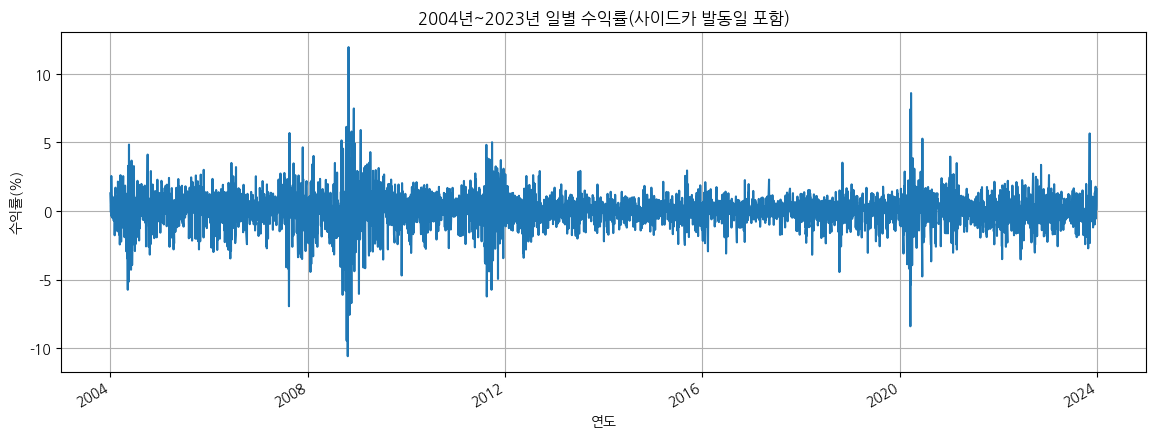

In [56]:
# 모든 일별 코스피 데이터

ks_day_all['수익률(%)'].plot(figsize=(14, 5))
plt.xlabel('연도')
plt.ylabel('수익률(%)')
plt.title('2004년~2023년 일별 수익률(사이드카 발동일 포함)')
plt.grid()

plt.show()

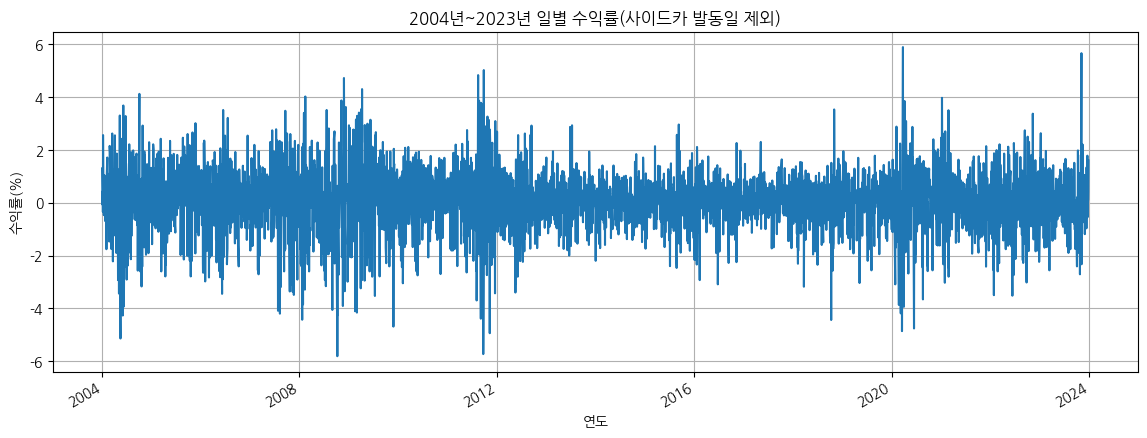

In [57]:
# 사이드카 발동일 제외 일별 코스피 데이터

ks_day['수익률(%)'].plot(figsize=(14, 5))
plt.xlabel('연도')
plt.ylabel('수익률(%)')
plt.title('2004년~2023년 일별 수익률(사이드카 발동일 제외)')
plt.grid()

plt.show()

> #### b) '연도 & 월' 기준 DAY 데이터 분석

*   '연도 & 월'이라는 새로운 열을 생성



In [58]:
ks_day_all['연도 & 월'] = ks_day_all.index.strftime('%Y%m')

ks_day_all

,종가,시가,수익률(%),연도 & 월
날짜,,,,
2004-01-02,821.26,816.26,1.30,200401
2004-01-05,824.10,817.28,0.35,200401
2004-01-06,823.43,831.26,-0.08,200401
2004-01-07,827.07,826.08,0.44,200401
2004-01-08,824.15,831.10,-0.35,200401
...,...,...,...,...
2023-12-21,2600.02,2598.37,-0.55,202312
2023-12-22,2599.51,2617.72,-0.02,202312
2023-12-26,2602.59,2609.44,0.12,202312


In [59]:
ks_day['연도 & 월'] = ks_day.index.strftime('%Y%m')

ks_day

,종가,시가,수익률(%),연도 & 월
날짜,,,,
2004-01-02,821.26,816.26,1.30,200401
2004-01-05,824.10,817.28,0.35,200401
2004-01-06,823.43,831.26,-0.08,200401
2004-01-07,827.07,826.08,0.44,200401
2004-01-08,824.15,831.10,-0.35,200401
...,...,...,...,...
2023-12-21,2600.02,2598.37,-0.55,202312
2023-12-22,2599.51,2617.72,-0.02,202312
2023-12-26,2602.59,2609.44,0.12,202312


*   '연도 & 월'을 기준으로 데이터를 그룹화하고, 각 그룹에서 '수익률' 열의 평균 계산

*   '연도 & 월'로 변동성이 어떻게 변하는지를 살펴보고 특정 시기에 변동성이 높거나 낮은지를 파악



In [60]:
# 20년치 년도월별 일 평균 수익률 (모든 일별 코스피 데이터)

yearly_mean_change_all = ks_day_all.groupby(['연도 & 월'])['수익률(%)'].mean()
print(yearly_mean_change_all)

연도 & 월
200401    0.26
200402    0.21
200403   -0.01
200404   -0.09
200405   -0.33
          ... 
202308   -0.13
202309   -0.19
202310   -0.41
202311    0.50
202312    0.25
Name: 수익률(%), Length: 240, dtype: float64


In [61]:
# 20년치 년도월별 일 평균 수익률 (사이드카 발동일 제외 일별 코스피 데이터)

yearly_mean_change = ks_day.groupby(['연도 & 월'])['수익률(%)'].mean()
print(yearly_mean_change)

연도 & 월
200401    0.26
200402    0.21
200403    0.11
200404   -0.09
200405   -0.32
          ... 
202308   -0.13
202309   -0.19
202310   -0.41
202311    0.50
202312    0.25
Name: 수익률(%), Length: 240, dtype: float64


In [62]:
year_mean_all = ks_day_all.groupby(ks_day_all.index.year)['수익률(%)'].mean()

year_mean_all   # 연도별 일 평균 수익률 (모든 일별 코스피 데이터)

날짜
2004    0.05
2005    0.18
2006    0.02
2007    0.12
2008   -0.18
2009    0.17
2010    0.08
2011   -0.03
2012    0.04
2013    0.01
2014   -0.02
2015    0.01
2016    0.02
2017    0.08
2018   -0.07
2019    0.03
2020    0.12
2021    0.02
2022   -0.11
2023    0.07
Name: 수익률(%), dtype: float64

In [63]:
year_mean = ks_day.groupby(ks_day.index.year)['수익률(%)'].mean()

year_mean   # 연도별 일 평균 수익률 (사이드카 발동일 제외 일별 코스피 데이터)

날짜
2004    0.06
2005    0.18
2006    0.02
2007    0.13
2008   -0.17
2009    0.17
2010    0.08
2011    0.02
2012    0.04
2013    0.01
2014   -0.02
2015    0.01
2016    0.02
2017    0.08
2018   -0.07
2019    0.03
2020    0.13
2021    0.02
2022   -0.11
2023    0.07
Name: 수익률(%), dtype: float64

> #### c) '연도 & 월' 기준 DAY 데이터 변동성 시각화

*   '연도 & 월'에 따른 일 평균 수익률을 시각화


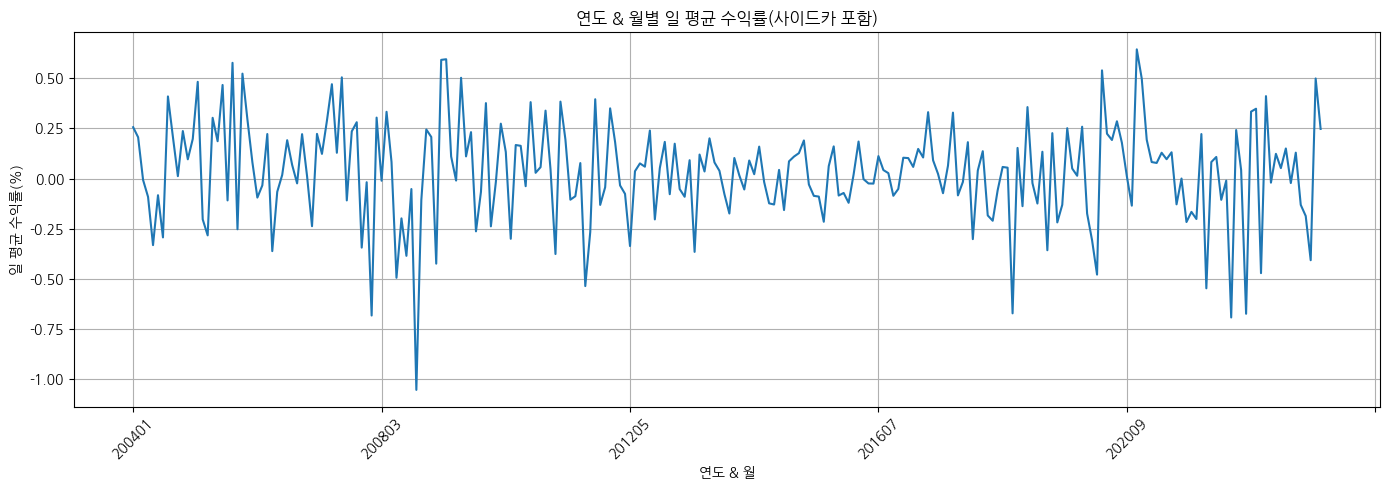

In [64]:
# 20년치 년도월별 일 평균 수익률 시각화 (모든 일별 코스피 데이터)

plt.figure(figsize=(14, 5))
yearly_mean_change_all.plot()
plt.xlabel('연도 & 월')
plt.ylabel('일 평균 수익률(%)')
plt.title('연도 & 월별 일 평균 수익률(사이드카 포함)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

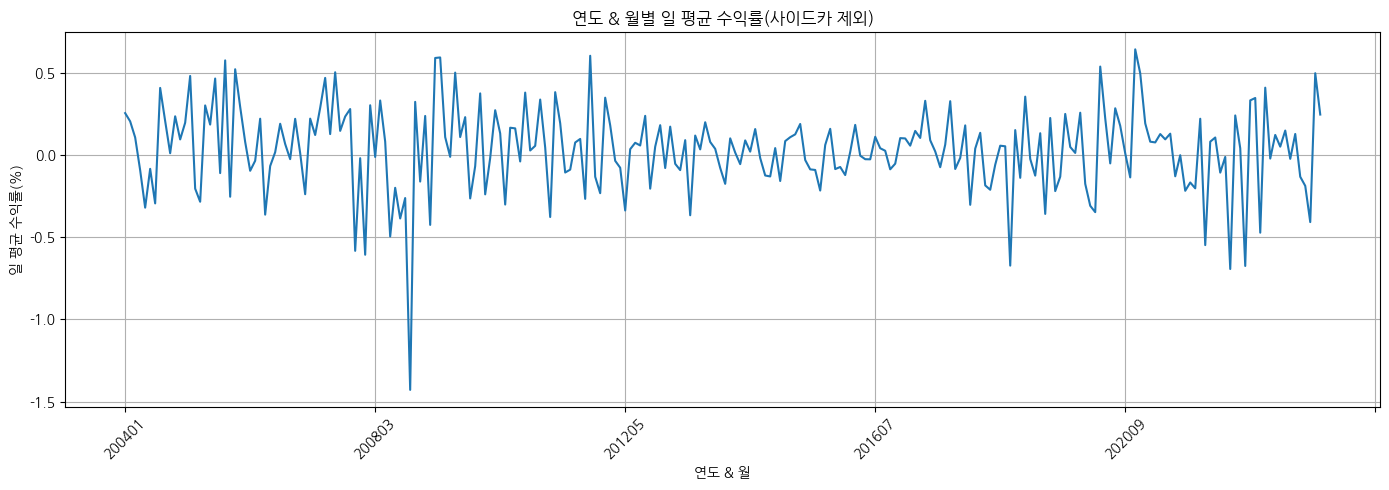

In [65]:
# 20년치 년도월별 일 평균 수익률 시각화 (사이드카 발동일 제외 일별 코스피 데이터)

plt.figure(figsize=(14, 5))
yearly_mean_change.plot()
plt.xlabel('연도 & 월')
plt.ylabel('일 평균 수익률(%)')
plt.title('연도 & 월별 일 평균 수익률(사이드카 제외)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*   캘린더 효과를 분석하기에는 이상치(사이드카 발동일)을 제외한 날짜를 보는것이 더 정확한 분석이 될것이라 판단하여 이후에는 ks_day 데이터만(사이드카 발동일 제외)활용하여 분석함


# III. 한국 명절 캘린더 효과 유효성 검증



> ## 0) pytimekr 패키지 불러오기

* pytimekr 패키지 - 한국의 음력/양력 변환, 공휴일 정보를 제공

In [66]:
!pip install pytimekr

  Preparing metadata (setup.py) ... done
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7922 sha256=c37b3bdf7ec02d570056b7d941db6bcf8cb13abeca6c088d6986dd3fee1ef502
  Stored in directory: /root/.cache/pip/wheels/b3/a3/ba/e73aaae1dec550b8667510c379b019295bba855275258745de
Successfully built pytimekr


In [67]:
from pytimekr import pytimekr

*  한국의 2023년 공휴일을 확인

In [68]:
kr_holidays = pytimekr.holidays(year=2023)
kr_holidays

[datetime.date(2023, 1, 21),
 datetime.date(2023, 1, 22),
 datetime.date(2023, 1, 23),
 datetime.date(2023, 9, 28),
 datetime.date(2023, 9, 29),
 datetime.date(2023, 9, 30),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 3, 1),
 datetime.date(2023, 5, 5),
 datetime.date(2023, 5, 26),
 datetime.date(2023, 6, 6),
 datetime.date(2023, 8, 15),
 datetime.date(2023, 10, 9),
 datetime.date(2023, 10, 3),
 datetime.date(2023, 12, 25)]

In [69]:
type(kr_holidays[0])

datetime.date

*  pytimekr 패키지를 사용하여 한국 공휴일 정보들 확인

In [70]:
pytimekr.chuseok()                     # 추석
pytimekr.lunar_newyear()               # 설날
pytimekr.hangul()                      # 한글날
pytimekr.children()                    # 어린이날
pytimekr.independence()                # 광복절
pytimekr.memorial()                    # 현충일
pytimekr.buddha()                      # 석가탄신일
pytimekr.samiljeol()                   # 삼일절
pytimekr.constitution()                # 제헌절

datetime.date(2024, 7, 17)

In [71]:
lunar_newyear_2022 = pytimekr.lunar_newyear(2022)
pytimekr.red_days(lunar_newyear_2022)

[datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2)]

In [72]:
lunar_newyear_2004 = pytimekr.lunar_newyear(2004)
pytimekr.red_days(lunar_newyear_2004)

[datetime.date(2004, 1, 21),
 datetime.date(2004, 1, 22),
 datetime.date(2004, 1, 23)]

In [73]:
pytimekr.chuseok(year=1986)

datetime.date(1986, 9, 18)

In [74]:
chuseok_2020 = pytimekr.chuseok(year=2020)
pytimekr.red_days(chuseok_2020)

[datetime.date(2020, 9, 30),
 datetime.date(2020, 10, 1),
 datetime.date(2020, 10, 2)]

> ## 1) 설날 데이터



> ### 1-1) 데이터 전처리

*  한국 증시(KOSPI)의 설날 전 5영업일 데이터를 추출

*  2004년부터 2023년까지의 음력 설날 기준


In [75]:
import numpy as np  # numpy 모듈 추가
from pytimekr import pytimekr
from datetime import timedelta

ks_ny_5 = []
for year in range(2004, 2024):
    lunar_new_year = pytimekr.lunar_newyear(year)
    lunar_new_year = np.datetime64(lunar_new_year)  # datetime64[ns]로 변환
    ny_5 = ks_day.index[ks_day.index < lunar_new_year][-5:]
    for date in ny_5:
        ks_ny_5.append(date)

ks_ny_5

[Timestamp('2004-01-14 00:00:00'),
 Timestamp('2004-01-15 00:00:00'),
 Timestamp('2004-01-16 00:00:00'),
 Timestamp('2004-01-19 00:00:00'),
 Timestamp('2004-01-20 00:00:00'),
 Timestamp('2005-02-01 00:00:00'),
 Timestamp('2005-02-02 00:00:00'),
 Timestamp('2005-02-03 00:00:00'),
 Timestamp('2005-02-04 00:00:00'),
 Timestamp('2005-02-07 00:00:00'),
 Timestamp('2006-01-23 00:00:00'),
 Timestamp('2006-01-24 00:00:00'),
 Timestamp('2006-01-25 00:00:00'),
 Timestamp('2006-01-26 00:00:00'),
 Timestamp('2006-01-27 00:00:00'),
 Timestamp('2007-02-12 00:00:00'),
 Timestamp('2007-02-13 00:00:00'),
 Timestamp('2007-02-14 00:00:00'),
 Timestamp('2007-02-15 00:00:00'),
 Timestamp('2007-02-16 00:00:00'),
 Timestamp('2008-01-30 00:00:00'),
 Timestamp('2008-01-31 00:00:00'),
 Timestamp('2008-02-01 00:00:00'),
 Timestamp('2008-02-04 00:00:00'),
 Timestamp('2008-02-05 00:00:00'),
 Timestamp('2009-01-19 00:00:00'),
 Timestamp('2009-01-20 00:00:00'),
 Timestamp('2009-01-21 00:00:00'),
 Timestamp('2009-01-

* 설날 전 5영업일의 날짜 데이터 추출

In [76]:
ks_ny_5 = pd.DataFrame(ks_ny_5, columns=['날짜'])
ks_ny_5.set_index('날짜', inplace=True)

ks_ny_5

""
날짜
2004-01-14
2004-01-15
2004-01-16
2004-01-19
2004-01-20
...
2023-01-16
2023-01-17
2023-01-18


* 코스피 일별 데이터와 설날 5영업일 전 데이터를 행 기준으로 병합하고 인덱스가 겹치는 부분만 선택

In [77]:
# 두 데이터프레임을 인덱스를 기준으로 병합하여 겹치는 부분만 선택
merged_ny = pd.concat([ks_day, ks_ny_5], axis=1, join='inner')


# 결과 출력
merged_ny.head(30)

,종가,시가,수익률(%),연도 & 월
날짜,,,,
2004-01-14,849.62,847.27,0.14,200401
2004-01-15,845.66,849.02,-0.47,200401
2004-01-16,847.95,853.67,0.27,200401
2004-01-19,856.80,854.96,1.04,200401
2004-01-20,861.37,854.03,0.53,200401
2005-02-01,923.69,930.16,-0.97,200502
2005-02-02,921.44,925.98,-0.24,200502
2005-02-03,928.79,922.43,0.80,200502
2005-02-04,933.55,928.21,0.51,200502


> ### 1-2) 데이터 분석

* 연도별 설날 전 5일간 KOSPI 일 평균 수익률 계산

In [78]:
# 연도별 수익률 평균 계산 # 설날 전 5일
yearly_mean_ny = merged_ny.groupby(merged_ny.index.year)['수익률(%)'].mean()

# 결과 출력
print(yearly_mean_ny)

날짜
2004    0.30
2005    0.36
2006    0.90
2007    0.30
2008    0.73
2009   -0.74
2010    0.34
2011   -0.14
2012    0.78
2013   -0.07
2014   -0.30
2015    0.26
2016    0.06
2017    0.11
2018    0.21
2019    0.24
2020   -0.01
2021   -0.18
2022   -1.22
2023    0.08
Name: 수익률(%), dtype: float64




> ### 1-3) 시각화

* 2004년부터 2023년까지의 연도별로 설날 전 5일의 KOSPI 수익률을 시각화

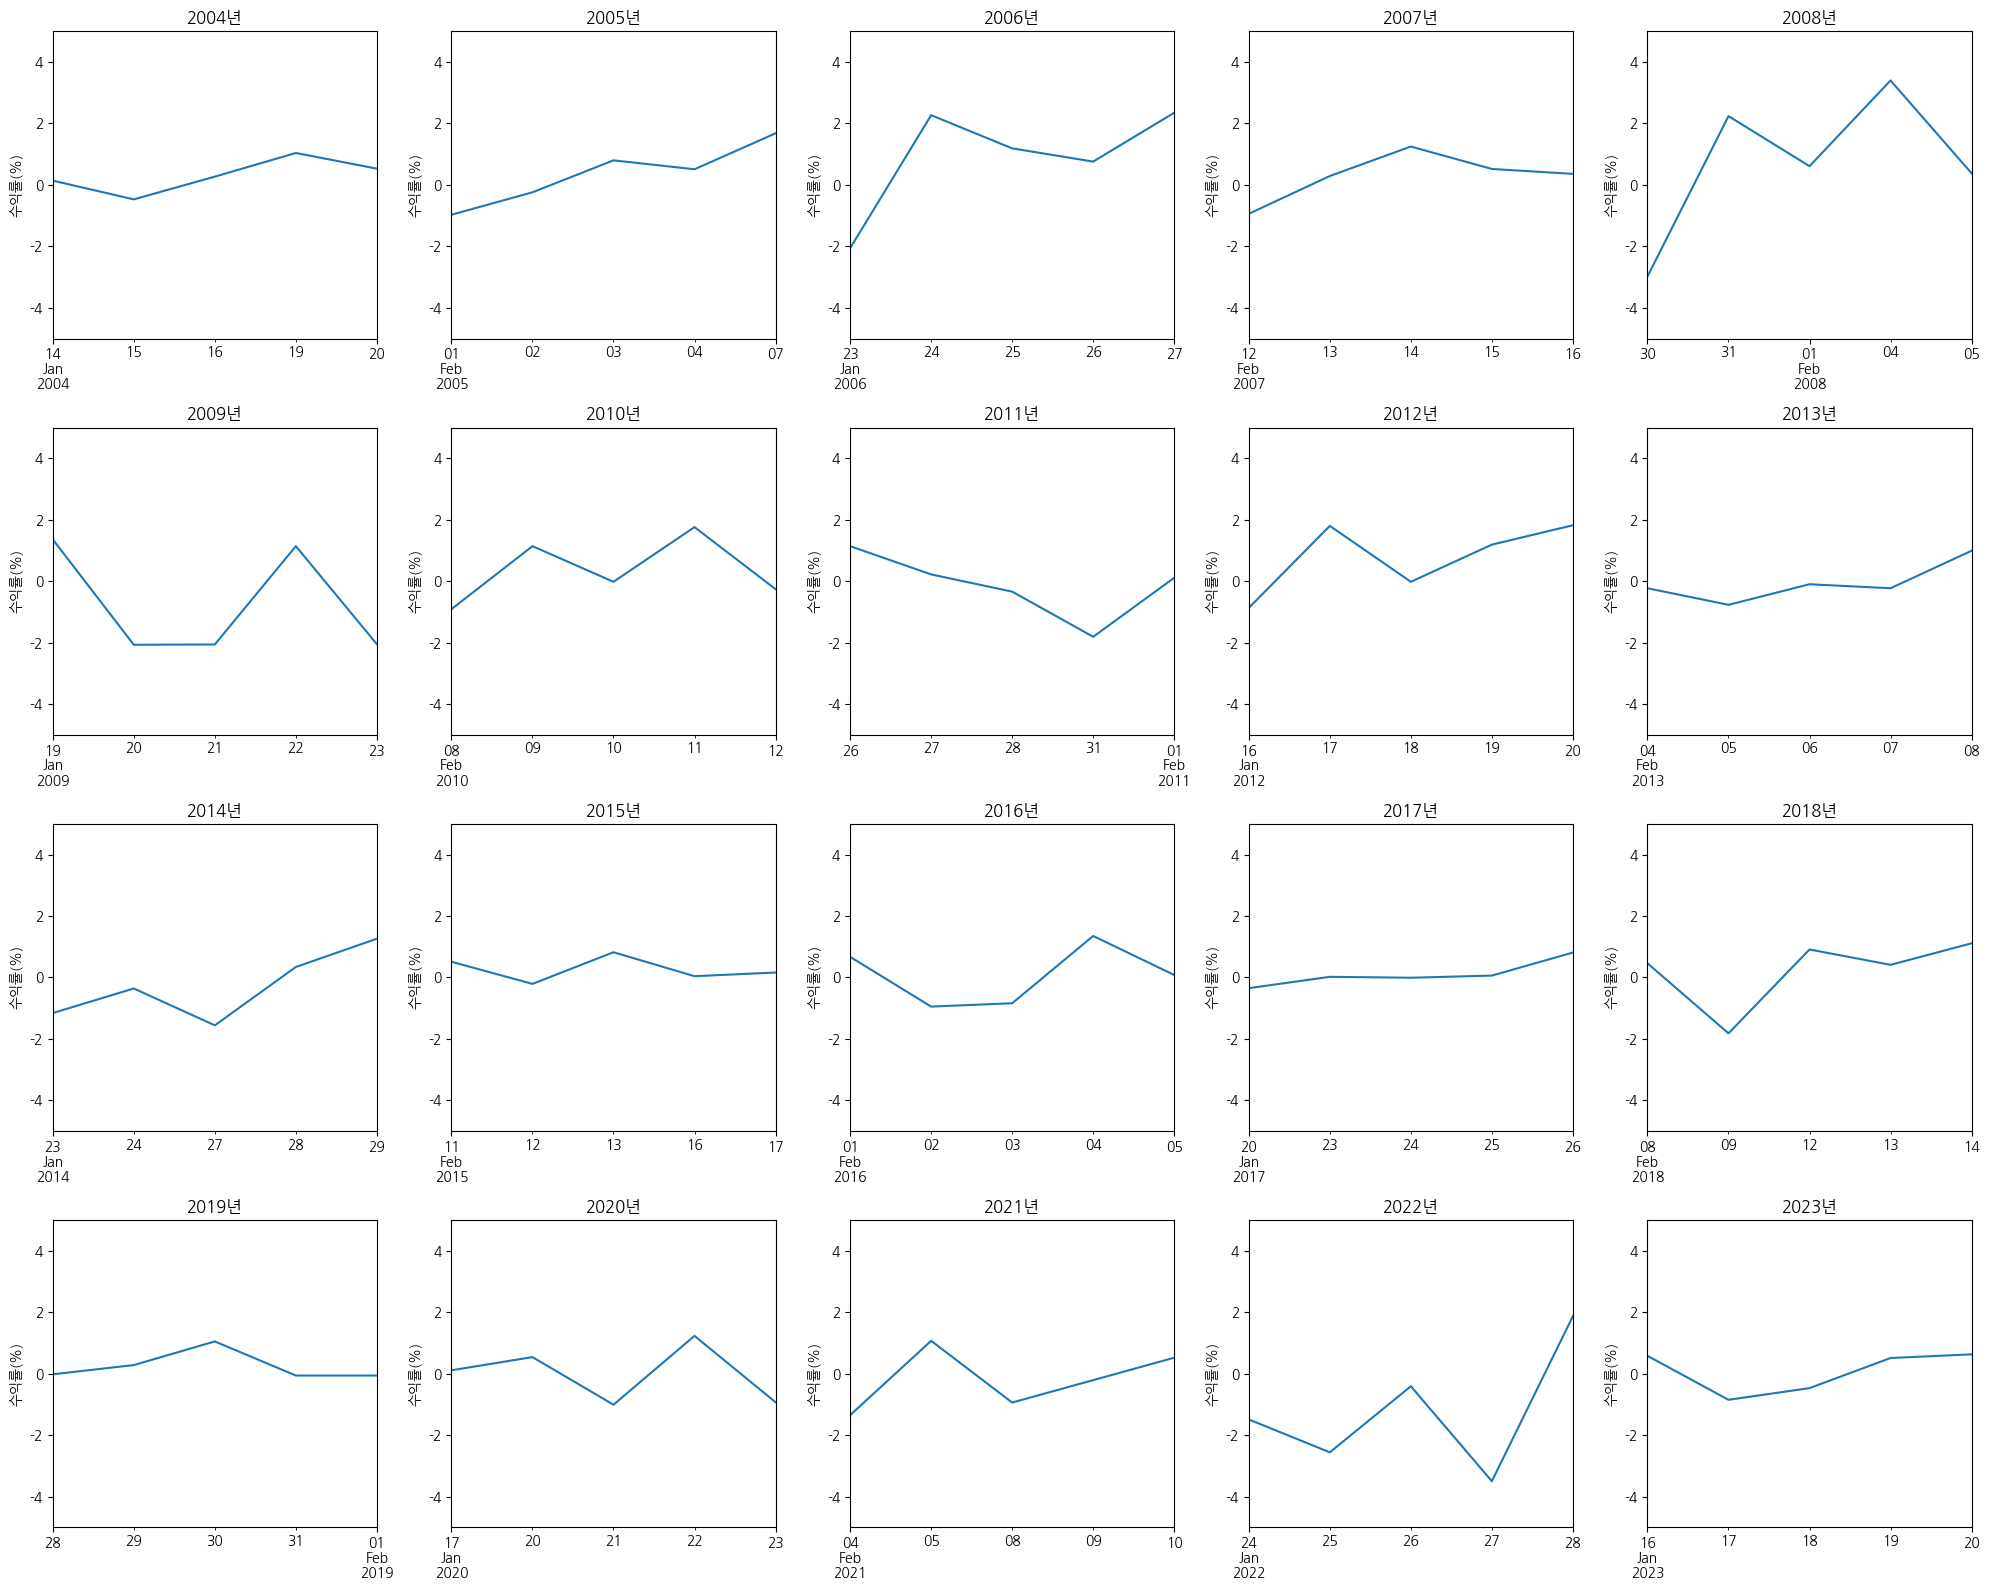

In [79]:
import matplotlib.pyplot as plt

# 그래프 행과 열 설정
num_rows = 4
num_cols = 5

# 그래프의 크기 설정
plt.figure(figsize=(20, 16))

# 각 연도에 대한 그래프 그리기
for i, year in enumerate(range(2004, 2024)):
    # 해당 연도의 데이터 추출
    year_data = merged_ny[merged_ny.index.year == year]

    # 각 연도별 서브플롯 설정
    plt.subplot(num_rows, num_cols, i+1)

    # 그래프 그리기
    year_data['수익률(%)'].plot()

    # 그래프 제목 설정
    plt.title(f"{year}년")

    # x축 라벨 설정
    plt.xlabel('')

    # y축 라벨 설정
    plt.ylabel('수익률(%)')

    # y축 범위 설정
    plt.ylim(-5, 5)  # 원하는 범위로 수정해주세요

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


*   설날 직전 5거래일 - 나머지 일 간 t-test 진행

- 귀무가설 (H0) : "설날 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없다."
- 대립가설 (H1) : "설날 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 있다."

In [80]:
from scipy.stats import ttest_ind

# 코스피 20년 일별 데이터에서 설날 직전 5거래일을 제외
non_ny_dates = ks_day.drop(merged_ny.index, errors='ignore')['수익률(%)']

# 설날 직전 5거래일 동안의 일 평균 수익률 계산
mean_merged_ny_return = merged_ny['수익률(%)'].mean()

# 코스피 20년 일 평균 수익률 계산 (설날 직전 5거래일 제외)
mean_daily_return_exclude_ny = non_ny_dates.mean()

# t-테스트 수행
t_statistic, p_value = ttest_ind(non_ny_dates, merged_ny['수익률(%)'])

# 결과 출력
mean_merged_ny_return = "{:.2f}".format(mean_merged_ny_return)
mean_daily_return_exclude_ny = "{:.2f}".format(mean_daily_return_exclude_ny)
t_statistic_rd = "{:.2f}".format(t_statistic)
p_value_rd = "{:.2f}".format(p_value)

print("설날 직전 5거래일의 일 평균 수익률(%):", mean_merged_ny_return)
print("코스피 20년 일 평균 수익률(%) (설날 직전 5거래일 제외):", mean_daily_return_exclude_ny)
print("t-statistic:", t_statistic_rd)
print("p-value:", p_value_rd)

# 유의수준 설정 (신뢰수준 : 90%)
alpha = 0.1

# 결과 해석
if p_value < alpha:
    print("귀무가설이 기각되므로 통계적으로 유의합니다. 즉, 설날 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 있습니다.")
else:
    print("귀무가설이 채택되므로 통계적으로 유의하지 않습니다. 즉, 설날 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없습니다.")

설날 직전 5거래일의 일 평균 수익률(%): 0.10
코스피 20년 일 평균 수익률(%) (설날 직전 5거래일 제외): 0.04
t-statistic: -0.59
p-value: 0.55
귀무가설이 채택되므로 통계적으로 유의하지 않습니다. 즉, 설날 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없습니다.


## 2) 추석 데이터



> ### 2-1) 데이터 전처리

*  한국 증시(KOSPI)의 추석 전 5영업일 데이터를 추출

*  2004년부터 2023년까지의 음력 추석 기준

In [81]:
import numpy as np  # numpy 모듈 추가  ## 여기서부터 추석
from pytimekr import pytimekr
from datetime import timedelta

ks_ch_5 = []
for year in range(2004, 2024):
    chu_seok = pytimekr.chuseok(year)
    chu_seok = np.datetime64(chu_seok)  # datetime64[ns]로 변환
    ch_5 = ks_day.index[ks_day.index < chu_seok][-5:]
    for date in ch_5:
        ks_ch_5.append(date)

ks_ch_5

[Timestamp('2004-09-20 00:00:00'),
 Timestamp('2004-09-21 00:00:00'),
 Timestamp('2004-09-22 00:00:00'),
 Timestamp('2004-09-23 00:00:00'),
 Timestamp('2004-09-24 00:00:00'),
 Timestamp('2005-09-12 00:00:00'),
 Timestamp('2005-09-13 00:00:00'),
 Timestamp('2005-09-14 00:00:00'),
 Timestamp('2005-09-15 00:00:00'),
 Timestamp('2005-09-16 00:00:00'),
 Timestamp('2006-09-27 00:00:00'),
 Timestamp('2006-09-28 00:00:00'),
 Timestamp('2006-09-29 00:00:00'),
 Timestamp('2006-10-02 00:00:00'),
 Timestamp('2006-10-04 00:00:00'),
 Timestamp('2007-09-17 00:00:00'),
 Timestamp('2007-09-18 00:00:00'),
 Timestamp('2007-09-19 00:00:00'),
 Timestamp('2007-09-20 00:00:00'),
 Timestamp('2007-09-21 00:00:00'),
 Timestamp('2008-09-05 00:00:00'),
 Timestamp('2008-09-09 00:00:00'),
 Timestamp('2008-09-10 00:00:00'),
 Timestamp('2008-09-11 00:00:00'),
 Timestamp('2008-09-12 00:00:00'),
 Timestamp('2009-09-25 00:00:00'),
 Timestamp('2009-09-28 00:00:00'),
 Timestamp('2009-09-29 00:00:00'),
 Timestamp('2009-09-

* 추석 전 5영업일의 날짜 데이터 추출

In [82]:
ks_ch_5 = pd.DataFrame(ks_ch_5, columns=['날짜'])
ks_ch_5.set_index('날짜', inplace=True)

ks_ch_5

""
날짜
2004-09-20
2004-09-21
2004-09-22
2004-09-23
2004-09-24
...
2023-09-21
2023-09-22
2023-09-25


* 코스피 일별 데이터와 추석 5영업일 전 데이터를 행 기준으로 병합하고 인덱스가 겹치는 부분만 선택

In [83]:
# 두 데이터프레임을 인덱스를 기준으로 병합하여 겹치는 부분만 선택
merged_ch = pd.concat([ks_day, ks_ch_5], axis=1, join='inner')


# 결과 출력
merged_ch.head(30)

,종가,시가,수익률(%),연도 & 월
날짜,,,,
2004-09-20,856.87,849.46,1.03,200409
2004-09-21,857.15,859.20,0.03,200409
2004-09-22,835.10,861.80,-2.57,200409
2004-09-23,829.68,829.32,-0.65,200409
2004-09-24,832.10,828.78,0.29,200409
2005-09-12,1158.36,1158.09,0.51,200509
2005-09-13,1158.12,1160.27,-0.02,200509
2005-09-14,1170.77,1154.73,1.09,200509
2005-09-15,1169.59,1164.10,-0.10,200509


> ### 2-2) 데이터 분석

* 연도별 추석 전 5일간 KOSPI 일 평균 수익률 계산

In [84]:
# 연도별 수익률 평균 계산 # 추석 전 5일
yearly_mean_ch = merged_ch.groupby(merged_ch.index.year)['수익률(%)'].mean()

# 결과 출력
print(yearly_mean_ch)

날짜
2004   -0.37
2005    0.37
2006    0.12
2007    0.53
2008   -0.28
2009   -0.58
2010    0.15
2011   -0.56
2012   -0.06
2013    0.12
2014   -0.18
2015   -0.53
2016   -0.65
2017    0.05
2018    0.18
2019    0.60
2020   -0.03
2021    0.10
2022   -0.26
2023   -0.75
Name: 수익률(%), dtype: float64




> ### 2-3) 시각화

* 2004년부터 2023년까지의 연도별로 추석 전 5일의 KOSPI 수익률을 시각화

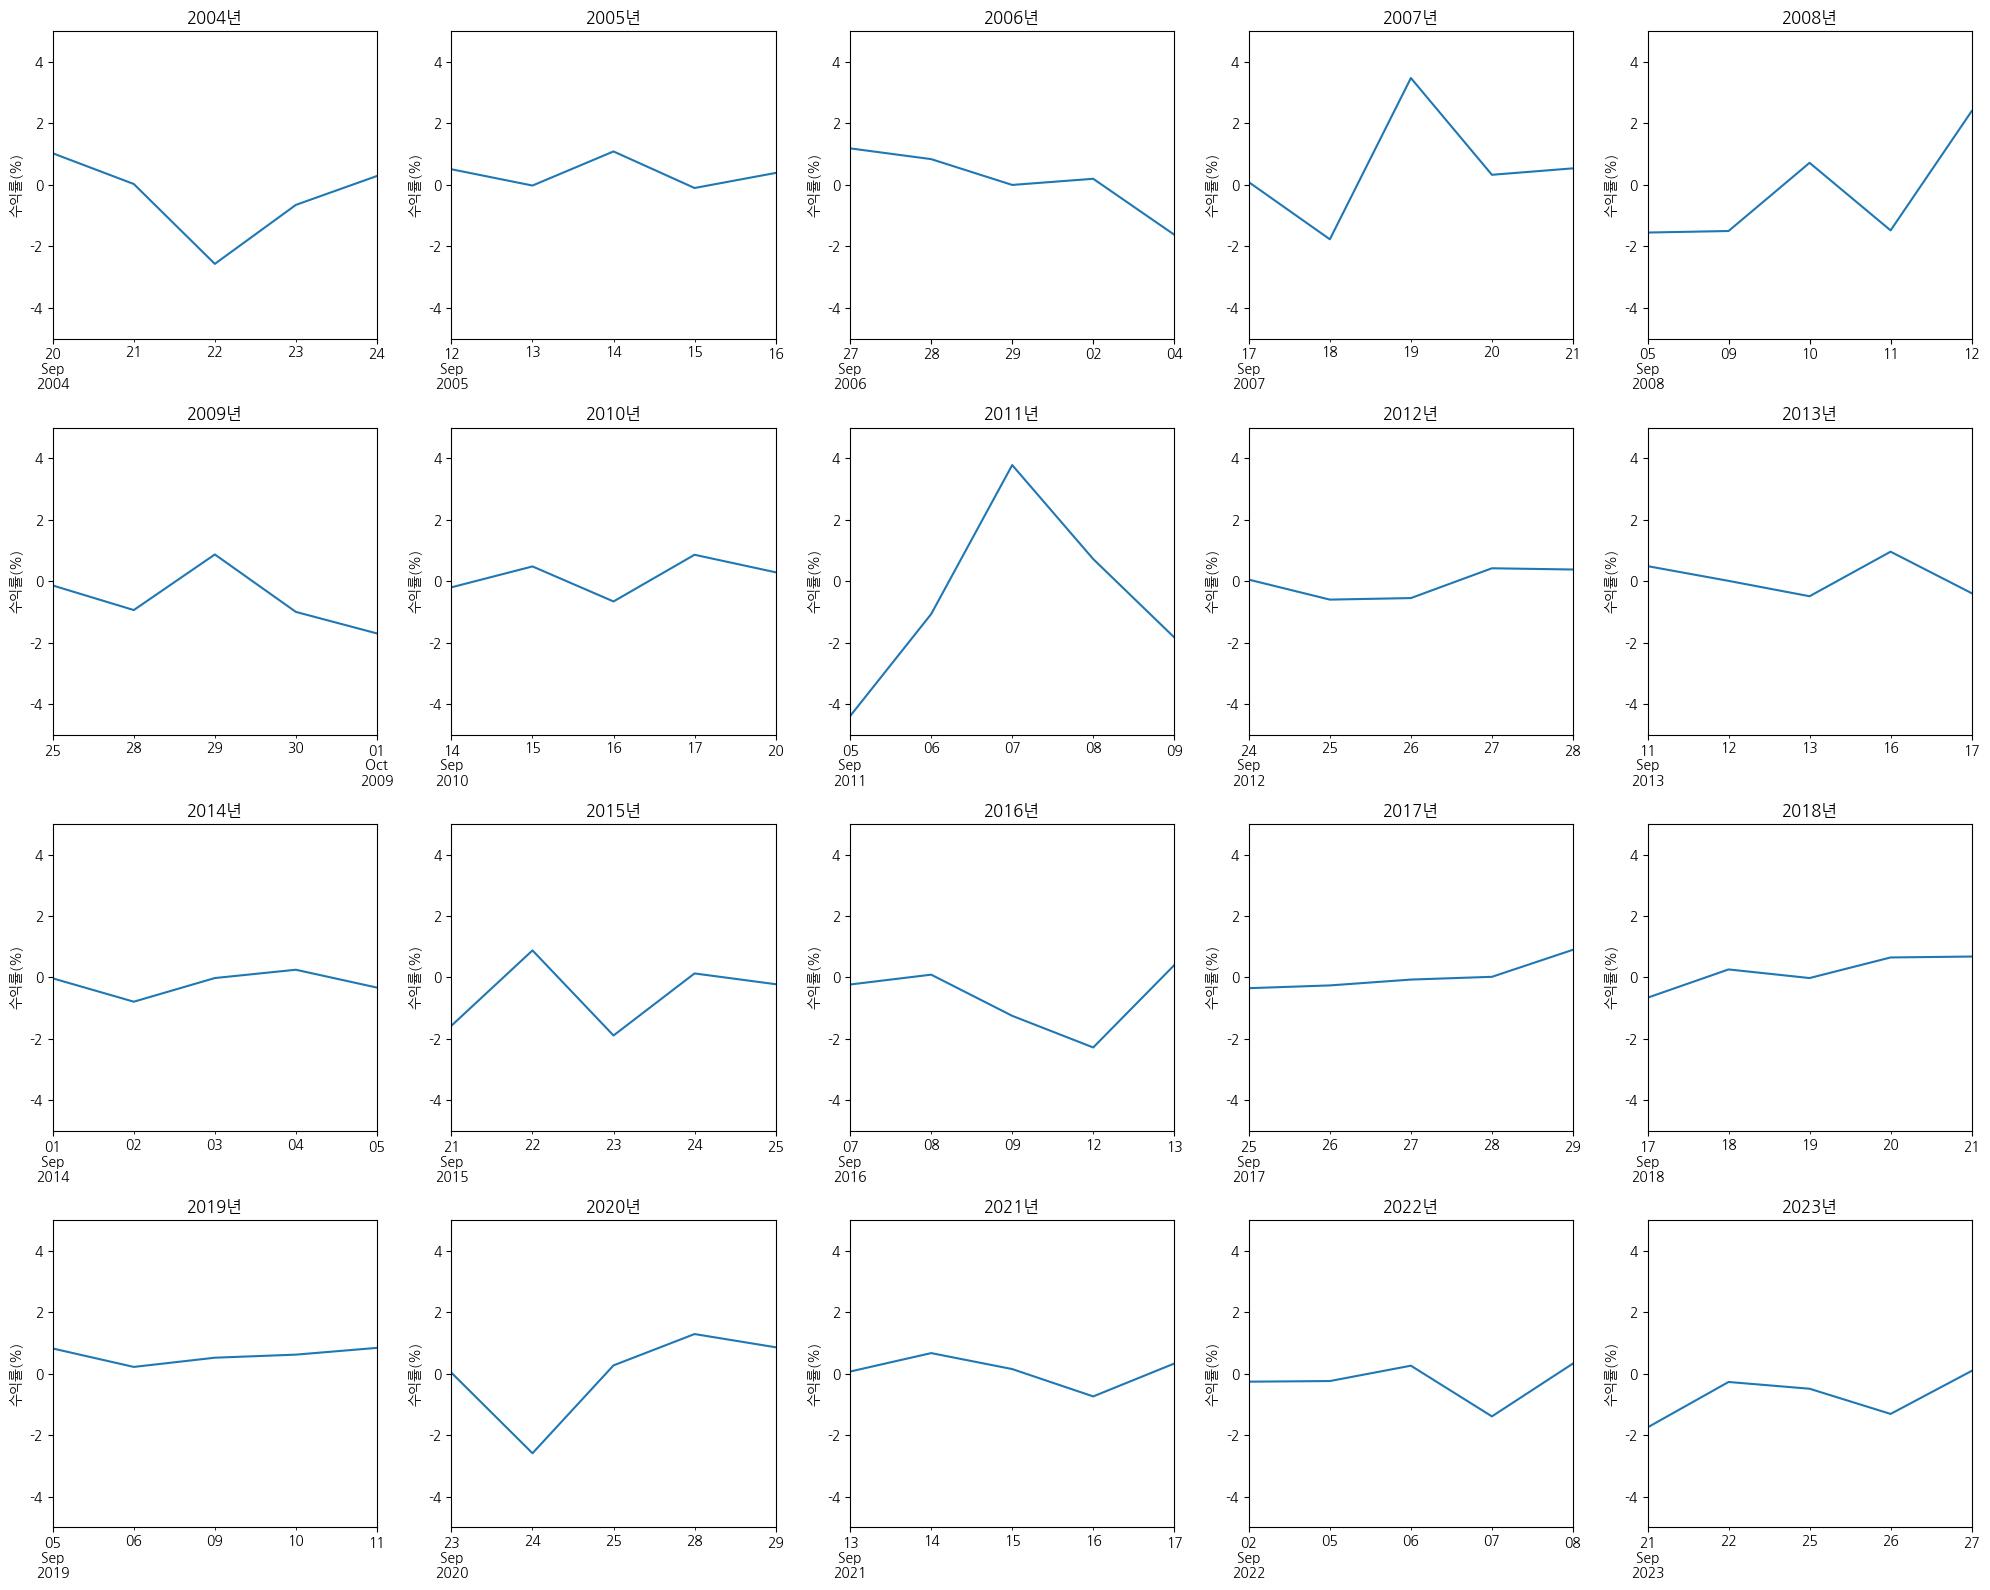

In [85]:
# 데이터 병합 후 인덱스 정렬
merged_ch.sort_index(inplace=True)

# 그래프 행과 열 설정
num_rows = 4
num_cols = 5

# 그래프의 크기 설정
plt.figure(figsize=(20, 16))

# 각 연도에 대한 그래프 그리기
for i, year in enumerate(range(2004, 2024)):
    # 해당 연도의 데이터 추출
    year_data = merged_ch[merged_ch.index.year == year]

    # 각 연도에 데이터가 있는 경우에만 그래프 그리기
    if not year_data.empty:
        # 각 연도별 서브플롯 설정
        plt.subplot(num_rows, num_cols, i+1)

        # 2006년의 경우
        if year == 2006:
            # 2006년 데이터를 추가
            x_labels = ['27\nSep\n2006', '28', '29', '02', '04']
            plt.plot(x_labels, year_data['수익률(%)'])

            # x축 눈금 조정
            plt.xticks(range(len(x_labels)), x_labels)

            # 그래프 영역 설정
            plt.xlim(0, len(x_labels) - 1)

        elif year == 2008:
            # 2008년 데이터를 추가
            x_labels = ['05\nSep\n2008', '09', '10', '11', '12']
            plt.plot(x_labels, year_data['수익률(%)'])

            # x축 눈금 조정
            plt.xticks(range(len(x_labels)), x_labels)

            # 그래프 영역 설정
            plt.xlim(0, len(x_labels) - 1)

        else:
            # 그래프 그리기
            year_data['수익률(%)'].plot()

            # 날짜 라벨 제거
            plt.xlabel('')

        # 그래프 제목 설정
        plt.title(f"{year}년")

        # y축 라벨 설정
        plt.ylabel('수익률(%)')

        # y축 범위 설정
        plt.ylim(-5, 5)  # 원하는 범위로 수정해주세요

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

*   추석 직전 5거래일 - 나머지 일 간 t-test 진행

- 귀무가설 (H0) : "추석 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없다."
- 대립가설 (H1) : "추석 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 있다."

In [86]:
from scipy.stats import ttest_ind

# 코스피 20년 일별 데이터에서 추석 직전 5거래일을 제외
non_ch_dates = ks_day.drop(merged_ch.index, errors='ignore')['수익률(%)']

# 추석 직전 5거래일 동안의 일 평균 수익률 계산
mean_merged_ch_return = merged_ch['수익률(%)'].mean()

# 코스피 20년 일 평균 수익률 계산 (추석 직전 5거래일 제외)
mean_daily_return_exclude_ch = non_ch_dates.mean()

# t-테스트 수행
t_statistic, p_value = ttest_ind(non_ch_dates, merged_ch['수익률(%)'])

# 결과 출력
mean_merged_ch_return = "{:.2f}".format(mean_merged_ch_return)
mean_daily_return_exclude_ch = "{:.2f}".format(mean_daily_return_exclude_ch)
t_statistic_rd = "{:.2f}".format(t_statistic)
p_value_rd = "{:.2f}".format(p_value)

print("추석 직전 5거래일의 일 평균 수익률(%):", mean_merged_ch_return)
print("코스피 20년 일 평균 수익률(%) (추석 직전 5거래일 제외):", mean_daily_return_exclude_ch)
print("t-statistic:", t_statistic_rd)
print("p-value:", p_value_rd)

# 유의수준 설정 (신뢰수준 : 90%)
alpha = 0.1

# 결과 해석
if p_value < alpha:
    print("귀무가설이 기각되므로 통계적으로 유의합니다. 즉, 추석 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 있습니다.")
else:
    print("귀무가설이 채택되므로 통계적으로 유의하지 않습니다. 즉, 추석 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없습니다.")

추석 직전 5거래일의 일 평균 수익률(%): -0.10
코스피 20년 일 평균 수익률(%) (추석 직전 5거래일 제외): 0.04
t-statistic: 1.26
p-value: 0.21
귀무가설이 채택되므로 통계적으로 유의하지 않습니다. 즉, 추석 직전 5거래일의 일 평균 수익률과 코스피 20년 일 평균 수익률에 차이가 없습니다.


#
#
#
# End Of Document
#
#
#